# Estimate Multiplicative ARIMA Model

This example shows how to estimate a multiplicative seasonal ARIMA model using 'estimate'. The time series is monthly international airline passenger numbers from 1949 to 1960. It is based on the MathWorks example from https://www.mathworks.com/help/econ/fit-multiplicative-seasonal-model-to-airline-passenger-data.html.

## Load Data and Specify Model.

Load the airline data set.

In [1]:
load Data_Airline

In [2]:
y = log(Data);
T = length(y);

Mdl = arima('Constant',0,'D',1,'Seasonality',12,...
    'MALags',1,'SMALags',12);

## Estimate the model

Use the first 13 observations as presample data, and the remaining 131 observations for estimation.

In [3]:
y0 = y(1:13);
[EstMdl,EstParamCov] = estimate(Mdl,y(14:end),'Y0',y0)

 
    ARIMA(0,1,1) Model Seasonally Integrated with Seasonal MA(12) (Gaussian Distribution):
 
                  Value      StandardError    TStatistic      PValue  
                _________    _____________    __________    __________

    Constant            0              0           NaN             NaN
    MA{1}        -0.37716       0.073426       -5.1366      2.7972e-07
    SMA{12}      -0.57238       0.093933       -6.0935      1.1047e-09
    Variance    0.0013887     0.00015242        9.1115      8.1249e-20


EstMdl = 

  arima with properties:

     Description: "ARIMA(0,1,1) Model Seasonally Integrated with Seasonal MA(12) (Gaussian Distribution)"
    Distribution: Name = "Gaussian"
               P: 13
               D: 1
               Q: 13
        Constant: 0
              AR: {}
             SAR: {}
              MA: {-0.377161} at lag [1]
             SMA: {-0.572379} at lag [12]
     Seasonality: 12
            Beta: [10]
        Variance: 0.00138874

EstParamCov =



## Infer residuals 

Infer the residuals from the fitted model.

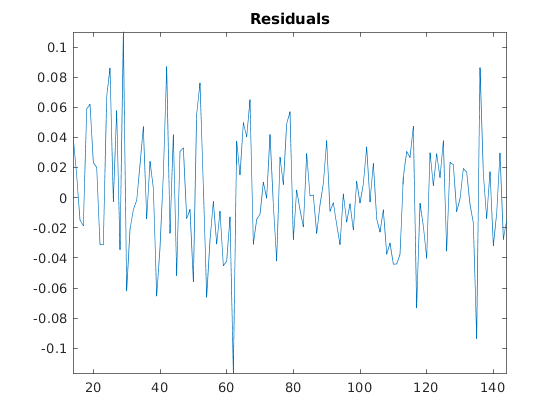

In [4]:
%plot inline
res = infer(EstMdl,y(14:end),'Y0',y0);

figure
plot(14:T,res)
xlim([0,T])
title('Residuals')
axis tight